# Forecasting

## Objective

Eatimate the short -term future trend of reliance industries using historical prices to provide directional insight for investment decision making

### Load Clean Data

In [2]:
import pandas as pd,numpy as np, matplotlib.pyplot as plt


In [3]:
market_df = pd.read_csv(r'C:\Users\sande\OneDrive\Documents\Data science AI&ML\Projects\Projects for Resume\Stock Market Analysis & Forecasting- Project\Data\processed\market_data.csv')
market_df.head()

,date,reliance_open,reliance_high,reliance_low,reliance_close,reliance_volume,nifty_open,nifty_high,nifty_low,nifty_close,nifty_volume,reliance_return,nifty_return
0,2021-01-04,904.640696,906.363699,892.352703,902.713623,24513534,14104.34961,14147.95020,13953.75000,14132.90039,495000,0.001686,0.008161
1,2021-01-05,892.806130,899.426244,886.911511,891.491211,24123091,14075.15039,14215.59961,14048.15039,14199.50000,492500,-0.012432,0.004712
2,2021-01-06,891.400457,891.445793,863.854552,867.980774,46401468,14240.95020,14244.15039,14039.90039,14146.25000,632300,-0.026372,-0.003750
3,2021-01-07,870.814696,881.923778,863.854564,866.575134,32325918,14253.75000,14256.25000,14123.09961,14137.34961,559200,-0.001619,-0.000629
4,2021-01-08,869.681241,878.931255,867.006006,876.800110,27540187,14258.40039,14367.29980,14221.65039,14347.25000,613500,0.011799,0.014847


* we forecast Reliance closing Price 

###  Simple trend based forecast

In [15]:
'''create a time_index since models cant learn directly from date string'''
market_df['time_index'] = np.arange(len(market_df))


'''Fit a linear regression (degree = 1) to capture the long-term price trend'''
coef = np.polyfit(
    market_df['time_index'], 
    market_df['reliance_close'],
    1 # degree 1 ploynomial for (straight line)
)

'''convert the learned coefficients into a callable prediction function'''
trend_fn = np.poly1d(coef)

### Forecast next 30 days

In [25]:
forecast_horizon = 30

last_index = market_df['time_index'].iloc[-1]
future_index = np.arange(last_index +1, last_index + forecast_horizon + 1)


forecast_prices = trend_fn(future_index)

future_dates = pd.date_range(
    start = market_df['date'].iloc[-1],
    periods = forecast_horizon + 1,
    freq = 'D'
)[1:]

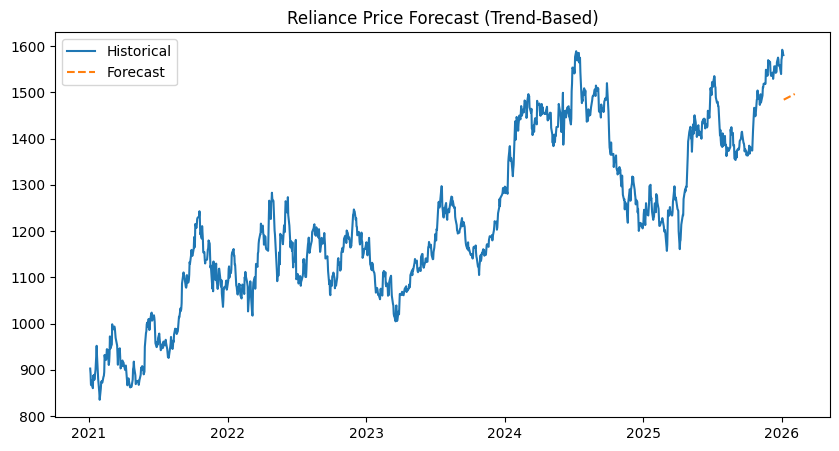

In [26]:
market_df["date"] = pd.to_datetime(market_df["date"])
future_dates = pd.to_datetime(future_dates)


plt.figure(figsize=(10,5))
plt.plot(market_df["date"], market_df["reliance_close"], label="Historical")
plt.plot(future_dates, forecast_prices, label="Forecast", linestyle="--")
plt.legend()
plt.title("Reliance Price Forecast (Trend-Based)")
plt.show()


### Plot last 1 year only

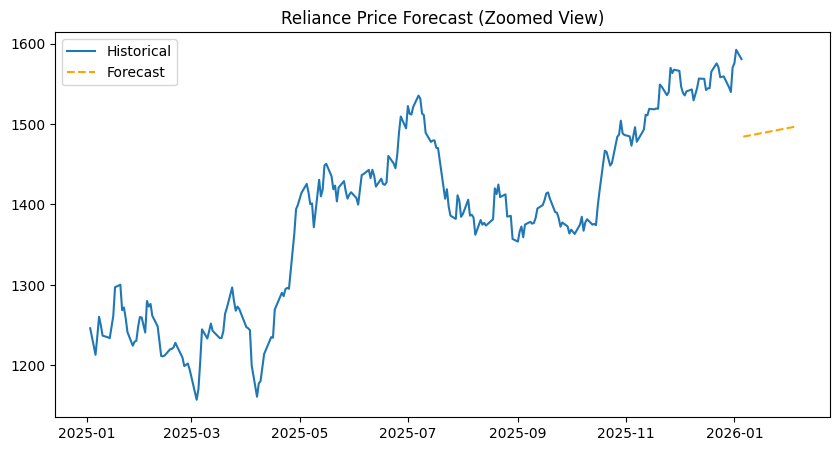

In [27]:
recent_df = market_df.tail(250)

plt.figure(figsize=(10,5))
plt.plot(recent_df["date"], recent_df["reliance_close"], label="Historical")
plt.plot(future_dates, forecast_prices, label="Forecast", linestyle="--", color="orange")
plt.legend()
plt.title("Reliance Price Forecast (Zoomed View)")
plt.show()


The trend-based forecast suggests a continuation of the prevailing price direction
for Reliance Industries over the next 30 days. This forecast is intended to provide
high-level directional insight rather than precise price predictions and should be
interpreted alongside volatility and risk analysis.
